<a href="https://colab.research.google.com/github/raghavaraghav3/CS-5783/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***Question 1***

In [127]:
datasetX_train = np.load('/content/drive/MyDrive/ML Practice/OSU_ML/Assignment1/x_train.npy')
datasetY_train = np.load('/content/drive/MyDrive/ML Practice/OSU_ML/Assignment1/y_train.npy')
datasetX_train
datasetY_train

array([  6.59815531,   2.61148145,   1.60055092,  -4.60753134,
        10.53345287,   9.75009482,   5.17331804,   5.46722989,
       -17.92134858,   4.5766958 ,   7.67949377,   2.39602798,
       -43.18986856,   9.63240521,   2.15157176,  32.94409902,
         2.31817583,  56.80208657,   2.77767077,   1.72208031,
         5.07963387,   2.61185947,  -3.39813927,   3.06682958,
        -6.18080857,  10.52582866,   7.11396287,   1.90284658,
        22.5638892 ,  13.62164877,  17.78881297,   4.85302906,
         9.96448943,   6.20595761,   5.13084373,   9.33960456,
         6.7119859 ,   6.22204351,  11.07438186,   1.5881529 ,
        12.73926299,   1.78018097,   6.25750814,  11.78788886,
         7.16704364, -30.55413276,   7.96320148, -48.79523662,
         6.22033038,   6.40243961,   6.62828718,  10.75828615,
         9.83499526,  -5.02666831,   4.62879537,   3.6465632 ,
         1.75478244,  15.43626766,   9.96889894,   9.49535574,
        16.5818648 ,  17.31792196,  10.410844  ,  13.58

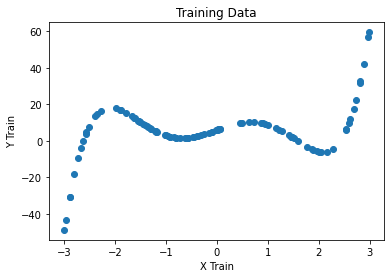

In [128]:
plt.scatter(datasetX_train, datasetY_train)
plt.xlabel('X Train')
plt.ylabel('Y Train')
plt.title('Training Data')
plt.show()

In [129]:
datasetX_test = np.load('/content/drive/MyDrive/ML Practice/OSU_ML/Assignment1/x_test.npy')
datasetY_test = np.load('/content/drive/MyDrive/ML Practice/OSU_ML/Assignment1/y_test.npy')

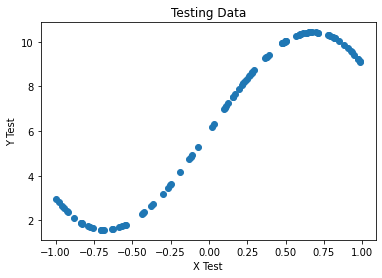

In [130]:
plt.scatter(datasetX_test, datasetY_test)
plt.xlabel('X Test')
plt.ylabel('Y Test')
plt.title('Testing Data')
plt.show()

2.a The relationship is not linear as seen in the training sets. We can see the graph is a 3th degree polynomial basis function in the relation between the X_train and the Y_train. Adding a 3th degree polynomial function can help fit the data.


In [135]:
class LinearRegression() :
    def __init__( self) :  
        self.learning_rate = 0.001
        self.iterations = 1000
        
    def fit( self, X, Y ) :

        self.m = X.shape[0]
        self.n = X.shape[1]
        self.W = np.zeros(self.n)
        self.X = X
        self.Y = Y
        self.b = 0

        for i in range( self.iterations):
            Y_pred = self.predict(self.X)
            
            dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) / self.m
            db = - 2 * np.sum( self.Y - Y_pred ) / self.m 

            change = self.learning_rate * dW

            self.W = self.W - change
            self.b = self.b - self.learning_rate * db
            
            return self
	
    def predict( self, X ) :
        return X.dot( self.W ) + self.b


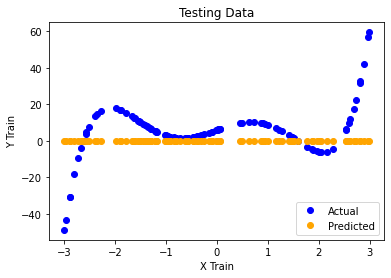

In [136]:
# Model training without any basis function
model = LinearRegression()
model.fit( datasetX_train, datasetY_train )
# Prediction on test set
Y_pred = model.predict( datasetX_train )
#print(Y_pred)
plt.plot( datasetX_train, datasetY_train, 'ro', color = 'blue', label = "Actual" )
plt.plot( datasetX_train, Y_pred, 'bo',color = 'orange',  label = "Predicted" )
plt.xlabel('X Train')
plt.ylabel('Y Train')
plt.title('Testing Data')
plt.legend(loc="lower right")
plt.show()

We can calculate the quadratic by squaring the x_train function and then concatenating it to the x_train data itself.

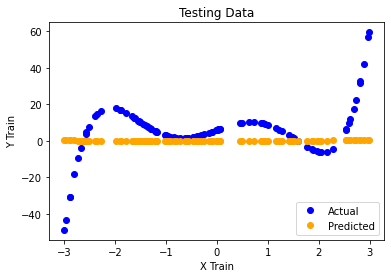

In [137]:
# Model training with addition of sqaure of x train
model2 = LinearRegression()
datasetX_train2 = np.concatenate((datasetX_train, np.power(datasetX_train, 2)), axis = 1)
model2.fit( datasetX_train2, datasetY_train )
# Prediction on test set
datasetX_test2 = np.concatenate((datasetX_test, np.power(datasetX_test, 2)), axis = 1)
Y_pred2 = model2.predict( datasetX_train2 )
#print(Y_pred2)
plt.plot( datasetX_train, datasetY_train, 'ro', color = 'blue', label = "Actual" )
plt.plot( datasetX_train, Y_pred2, 'bo',color = 'orange',  label = "Predicted" )
plt.xlabel('X Train')
plt.ylabel('Y Train')
plt.title('Testing Data')
plt.legend(loc="lower right")
plt.show()

As we can see the quadratic functio is underfitting, we can add one more exponential to the quadratic function to make it to 3 degree polynomial 

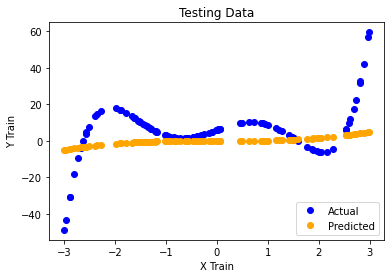

In [134]:
# Model training with addition of square of X train and cube of X train
model3 = LinearRegression()
datasetX_train3 = np.concatenate((datasetX_train, np.power(datasetX_train, 3)), axis = 1)
model3.fit( datasetX_train3, datasetY_train )
# Prediction on test set
datasetX_test3 = np.concatenate((datasetX_test, np.power(datasetX_test, 3)), axis = 1)
Y_pred3 = model3.predict( datasetX_train3 )
#print(Y_pred2)
plt.plot( datasetX_train, datasetY_train, 'ro', color = 'blue', label = "Actual" )
plt.plot( datasetX_train, Y_pred3, 'bo',color = 'orange',  label = "Predicted" )
plt.xlabel('X Train')
plt.ylabel('Y Train')
plt.title('Testing Data')
plt.legend(loc="lower right")
plt.show()

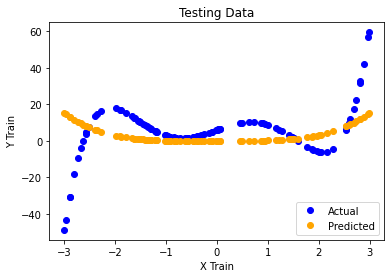

In [138]:
# Model training with addition of square of X train and cube of X train
model4 = LinearRegression()
datasetX_train4 = np.concatenate((datasetX_train, np.power(datasetX_train, 4)), axis = 1)
model4.fit( datasetX_train4, datasetY_train )
# Prediction on test set
datasetX_test4 = np.concatenate((datasetX_test, np.power(datasetX_test, 4)), axis = 1)
Y_pred4 = model4.predict( datasetX_train4 )
#print(Y_pred2)
plt.plot( datasetX_train, datasetY_train, 'ro', color = 'blue', label = "Actual" )
plt.plot( datasetX_train, Y_pred4, 'bo',color = 'orange',  label = "Predicted" )
plt.xlabel('X Train')
plt.ylabel('Y Train')
plt.title('Testing Data')
plt.legend(loc="lower right")
plt.show()

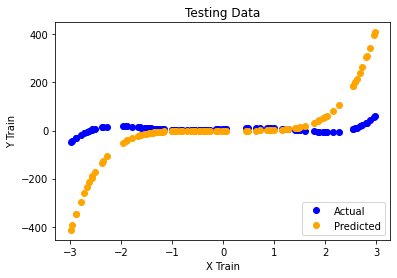

In [139]:
# Model training with addition of square of X train and cube of X train
model5 = LinearRegression()
datasetX_train5 = np.concatenate((datasetX_train, np.power(datasetX_train, 5)), axis = 1)
model5.fit( datasetX_train5, datasetY_train )
# Prediction on test set
datasetX_test5 = np.concatenate((datasetX_test, np.power(datasetX_test, 5)), axis = 1)
Y_pred5 = model5.predict( datasetX_train5 )
#print(Y_pred2)
plt.plot( datasetX_train, datasetY_train, 'ro', color = 'blue', label = "Actual" )
plt.plot( datasetX_train, Y_pred5, 'bo',color = 'orange',  label = "Predicted" )
plt.xlabel('X Train')
plt.ylabel('Y Train')
plt.title('Testing Data')
plt.legend(loc="lower right")
plt.show()

***Question 2***

In [98]:
House_dataset = pd.read_csv (r'/content/drive/MyDrive/ML Practice/OSU_ML/Assignment1/Assignment1_Q2_Data.csv')
House_dataset.drop(['House ID'], inplace = True, axis =1)
House_dataset

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type,Architecture type,# Fire places,Price (1000$)
0,4.9176,1.0,3.4720,0.998,1.0,7,4,42,3,1,0,25.9
1,5.0208,1.0,3.5310,1.500,2.0,7,4,62,1,1,0,29.5
2,4.5429,1.0,2.2750,1.175,1.0,6,3,40,2,1,0,27.9
3,4.5573,1.0,4.0500,1.232,1.0,6,3,54,4,1,0,25.9
4,5.0597,1.0,4.4550,1.121,1.0,6,3,42,3,1,0,29.9
5,3.8910,1.0,4.4550,0.988,1.0,6,3,56,2,1,0,29.9
6,5.8980,1.0,5.8500,1.240,1.0,7,3,51,2,1,1,30.9
7,5.6039,1.0,9.5200,1.501,0.0,6,3,32,1,1,0,28.9
8,16.4202,2.5,9.8000,3.420,2.0,10,5,42,2,1,1,84.9
9,14.4598,2.5,12.8000,3.000,2.0,9,5,14,4,1,1,82.9


In [99]:
House_datasetX = House_dataset.iloc[:, :-1].values
House_datasetX

array([[ 4.9176,  1.    ,  3.472 ,  0.998 ,  1.    ,  7.    ,  4.    ,
        42.    ,  3.    ,  1.    ,  0.    ],
       [ 5.0208,  1.    ,  3.531 ,  1.5   ,  2.    ,  7.    ,  4.    ,
        62.    ,  1.    ,  1.    ,  0.    ],
       [ 4.5429,  1.    ,  2.275 ,  1.175 ,  1.    ,  6.    ,  3.    ,
        40.    ,  2.    ,  1.    ,  0.    ],
       [ 4.5573,  1.    ,  4.05  ,  1.232 ,  1.    ,  6.    ,  3.    ,
        54.    ,  4.    ,  1.    ,  0.    ],
       [ 5.0597,  1.    ,  4.455 ,  1.121 ,  1.    ,  6.    ,  3.    ,
        42.    ,  3.    ,  1.    ,  0.    ],
       [ 3.891 ,  1.    ,  4.455 ,  0.988 ,  1.    ,  6.    ,  3.    ,
        56.    ,  2.    ,  1.    ,  0.    ],
       [ 5.898 ,  1.    ,  5.85  ,  1.24  ,  1.    ,  7.    ,  3.    ,
        51.    ,  2.    ,  1.    ,  1.    ],
       [ 5.6039,  1.    ,  9.52  ,  1.501 ,  0.    ,  6.    ,  3.    ,
        32.    ,  1.    ,  1.    ,  0.    ],
       [16.4202,  2.5   ,  9.8   ,  3.42  ,  2.    , 10.    ,  5.    ,
 

In [100]:
#getting the Y values
House_datasetY = House_dataset.iloc[:, -1:].values
House_datasetY

array([[25.9],
       [29.5],
       [27.9],
       [25.9],
       [29.9],
       [29.9],
       [30.9],
       [28.9],
       [84.9],
       [82.9],
       [35.9],
       [31.5],
       [31. ],
       [30.9],
       [30. ],
       [28.9],
       [36.9],
       [41.9],
       [40.5],
       [43.9],
       [37.5],
       [37.9],
       [44.5],
       [37.9],
       [38.9],
       [36.9],
       [45.8],
       [41. ]])

In [101]:
class LinearRegression :
        
    def __init__( self) :  
        self.learning_rate = 0.001
        self.iterations = 1000
        
    def fit( self, X, Y ) :

        self.m = X.shape[0]
        self.n = X.shape[1]
        self.W = np.ones((X.shape[1], 1))
        self.X = X
        self.Y = np.reshape(Y.flatten(), (Y.shape[0], 1))
        self.b = 0

        for i in range(self.iterations):
            self.update_parameters(X)
        return self

    def update_parameters( self, X ) :
            Y_pred = self.predict(X)
            # print("Y_Pred- :", Y_pred)
            # print("Y_Pred-type :", type(Y_pred))
            # print("Y_Pred- :", Y_pred.shape)
            diff = self.Y - Y_pred
            # print("type diff- :", type(diff))
            # print("diff- :", diff.shape)           
            # print("diff ", diff)
            dW = - np.dot(X.T, diff ) / self.m
            db = - np.sum( diff ) / self.m

            # print("dW- Type:", type(dW))
            # print("dW- shape:", dW.shape)
            # print("db- Type:", type(db))
            # print("db:", db)

            self.W = self.W - self.learning_rate * dW
            self.b = self.b - self.learning_rate * db
            
            return self
	
    def predict( self, X ):
        return np.dot(X, self.W ) + self.b

    
    def avg_lsm(self,y, y_pred):
    # This computes the average least squares error

        error = (1/2) * np.sum((y_pred - y) ** 2)
        return error / len(y)


In [112]:
Housing_model = LinearRegression()
Housing_model.fit( House_datasetX, House_datasetY )
# Prediction on Training set
Housing_model_pred = Housing_model.predict( House_datasetX )
#Printing Average least square error
print("1.The average least square error is",Housing_model.avg_lsm(House_datasetY,Housing_model_pred))

#Printing the weights so that we can determine which parameters has more weights
print( "Weights of parameters is",Housing_model.W )


1.The average least square error is 9.596948522283304
Weights of parameters is [[ 2.61667566]
 [ 1.61914597]
 [ 0.6440632 ]
 [ 1.86634652]
 [ 0.81432731]
 [ 0.908953  ]
 [ 1.16854158]
 [-0.09072114]
 [ 0.94941936]
 [ 0.19725021]
 [ 1.31684884]]


2.As we can see in the above the first paramater i.e., "Local Price" carries more weight. 

In [103]:
#Getting the data with only first column i.e., Local Price
House_datasetX_main= House_dataset.iloc[:, :1].values
House_datasetX_main

array([[ 4.9176],
       [ 5.0208],
       [ 4.5429],
       [ 4.5573],
       [ 5.0597],
       [ 3.891 ],
       [ 5.898 ],
       [ 5.6039],
       [16.4202],
       [14.4598],
       [ 5.8282],
       [ 5.3003],
       [ 6.2712],
       [ 5.9592],
       [ 5.05  ],
       [ 5.6039],
       [ 8.2464],
       [ 6.6969],
       [ 7.7841],
       [ 9.0384],
       [ 5.9894],
       [ 7.5422],
       [ 8.7951],
       [ 6.0931],
       [ 8.3607],
       [ 8.14  ],
       [ 9.1416],
       [12.    ]])

The average least square error is 16.025727481072348
Weights of parameters is [[5.01858261]]


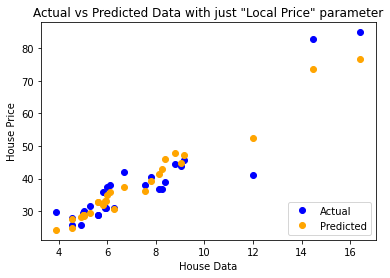

In [111]:
Housing_model_1 = LinearRegression()
Housing_model_1.fit( House_datasetX_main, House_datasetY )
# Prediction on Training set with only 1st column
Housing_model_pred1 = Housing_model_1.predict( House_datasetX_main )
#Printing Average least square error
print("The average least square error is",Housing_model_1.avg_lsm(House_datasetY,Housing_model_pred1))
print( "Weights of parameters is",Housing_model_1.W )
plt.plot( House_datasetX_main, House_datasetY, 'ro', color = 'blue', label = 'Actual')
plt.plot( House_datasetX_main, Housing_model_pred, 'bo', color = 'orange', label = 'Predicted')
plt.xlabel('House Data')
plt.ylabel('House Price')
plt.title('Actual vs Predicted Data with just "Local Price" parameter')
plt.legend(loc="lower right")
plt.show()

3. In the parameters weights we can see that seventh parameter i.e., "Age of home" has less weight and hence it has less impact on the final value.

In [109]:
# getting all the columns except "Age of home" column
House_dataset
House_datasetX_2= House_dataset.loc[:, House_dataset.columns != 'Age of home']
House_datasetX_3 =House_datasetX_2.iloc[:,:-1]
House_datasetX_3

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Construction type,Architecture type,# Fire places
0,4.9176,1.0,3.4720,0.998,1.0,7,4,3,1,0
1,5.0208,1.0,3.5310,1.500,2.0,7,4,1,1,0
2,4.5429,1.0,2.2750,1.175,1.0,6,3,2,1,0
3,4.5573,1.0,4.0500,1.232,1.0,6,3,4,1,0
4,5.0597,1.0,4.4550,1.121,1.0,6,3,3,1,0
5,3.8910,1.0,4.4550,0.988,1.0,6,3,2,1,0
6,5.8980,1.0,5.8500,1.240,1.0,7,3,2,1,1
7,5.6039,1.0,9.5200,1.501,0.0,6,3,1,1,0
8,16.4202,2.5,9.8000,3.420,2.0,10,5,2,1,1
9,14.4598,2.5,12.8000,3.000,2.0,9,5,4,1,1


In [114]:
Housing_model_2 = LinearRegression()
Housing_model_2.fit( House_datasetX_3, House_datasetY )
# Prediction on Training set with only 1st column
Housing_model_pred2 = Housing_model_2.predict( House_datasetX_3 )
#Printing Average least square error
print("The average least square error is",Housing_model_2.avg_lsm(House_datasetY,Housing_model_pred2))
print( "Weights of parameters is",Housing_model_2.W )

The average least square error is 9.849651687445146
Weights of parameters is [[2.94932266]
 [1.5881769 ]
 [0.76999225]
 [1.847728  ]
 [0.77242267]
 [0.23380341]
 [0.82474067]
 [0.67335214]
 [0.27239144]
 [1.23368536]]


As we can see above when removing one column "Age of home" the least square error increases only small amount

***Question 3***

In locally weighted estimate we use the below equation 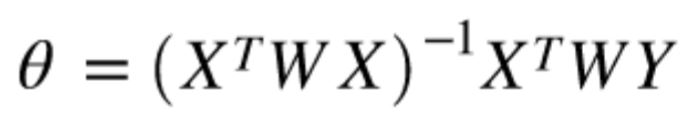 

In [116]:
# Compute the weight of the query value

def weights(X, predi_val, tau):
    W = np.ones((X.shape[0], 1))

    for i in range (X.shape[0]):
        denomi_constant = -2 * tau ** 2
        W[i] = np.exp(np.dot((X[i, :] - predi_val),(X[i, :] - predi_val))/(denomi_constant))

    return W

In [117]:
def theta(X, y, predi_val):
    W = weights(X, predi_val, 0.5)
    W = W.ravel()
    W = np.diag(W)
    y = np.reshape(y.flatten(), (y.shape[0], 1))

    #This calculates the above theta value
    theta = np.dot(np.linalg.pinv(np.dot(np.dot(X.T, W), X)), np.dot(np.dot(X.T, W), y))

    return theta

In [120]:
def predict(X, y):
    thetas = []
    for i in range(datasetX_train.shape[0]):
        theta_p = theta(X, y, X[i, :])
        thetas.append(theta_p[0])

    thetas = np.array(thetas)
    thetas = np.reshape(thetas, thetas.shape)

    return thetas * X

In [121]:
#Making Prediction
y_predicted = predict(datasetX_train, datasetY_train)
print(y_predicted)

[[ 7.68464692e+00]
 [ 1.43452162e+00]
 [ 2.90878993e+00]
 [ 2.52603224e+00]
 [ 9.05308612e+00]
 [ 3.68013257e+00]
 [ 6.96312071e+00]
 [ 2.10259548e+00]
 [-1.13454624e+01]
 [ 2.43377957e-01]
 [-4.22405159e+00]
 [ 4.92318775e+00]
 [-1.54650252e+01]
 [ 1.87870079e+01]
 [ 1.37276333e+00]
 [ 2.51651120e+01]
 [ 1.39674385e+00]
 [ 2.93268217e+01]
 [ 1.29704129e+00]
 [ 2.53175569e+00]
 [ 8.22863807e-02]
 [ 5.14530552e+00]
 [ 1.82803959e+00]
 [ 5.55458324e+00]
 [ 5.03937658e+00]
 [ 9.05133257e+00]
 [ 7.91444388e+00]
 [ 4.28031004e+00]
 [ 2.27739266e+01]
 [-1.03597691e+00]
 [ 7.28506732e+00]
 [ 6.78072767e+00]
 [ 3.77168544e+00]
 [ 2.69824329e-02]
 [ 6.93941347e+00]
 [ 8.73328491e+00]
 [ 7.73669878e+00]
 [ 2.33368722e+00]
 [ 9.16734680e+00]
 [ 3.46059392e+00]
 [ 9.37824799e+00]
 [ 4.05674965e+00]
 [ 1.74155397e+01]
 [ 1.95696919e+01]
 [ 2.65269822e+00]
 [-1.35884942e+01]
 [ 8.25975198e+00]
 [-1.62126784e+01]
 [ 1.73992374e+01]
 [ 7.00373993e-02]
 [ 1.41107659e-01]
 [ 9.10303422e+00]
 [ 3.1271344

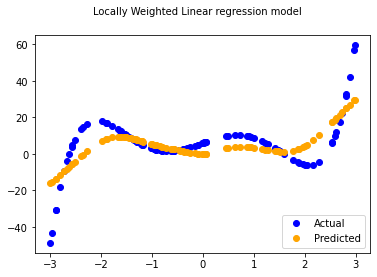

In [125]:
plt.plot(datasetX_train, datasetY_train, 'ro',  color = 'blue', label="Actual")
plt.plot(datasetX_train, y_predicted, 'bo', color = 'orange', label="Predicted")
plt.suptitle("Locally Weighted Linear regression model", fontsize=10)
plt.legend(loc="lower right")
plt.show()

1. There is no need for any basis function
2. For each predicting value we need to fnd weights every time and this increases cost. Also, the model is not generalised and hence it will overfit and may perform poorly with the new data or for outliers.